# <b> Supporting Code

In [2]:
%%bash
# run every time
pip install scprep
pip install umap-learn

  Using cached scprep-1.2.3-py3-none-any.whl (94 kB)
  Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)


In [3]:
import pandas as pd
import numpy as np
import scprep, umap 
import matplotlib.pyplot as plt
%matplotlib inline 

### <b> Loading Data

In [5]:
liver_data = scprep.io.load_csv("/home/jovyan/BIOENGC249/final/Liver-counts.csv",
    cell_axis='row', sparse=True).transpose()

liver_data.head()

0610005C13Rik  0610007C21Rik  0610007L01Rik  \
F18.MAA000377.3_9_M.1.1            0.0            0.0           23.0   
J20.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
F19.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
J21.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
F20.MAA000377.3_9_M.1.1            0.0            2.0            0.0   

                         0610007N19Rik  0610007P08Rik  0610007P14Rik  \
F18.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
J20.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
F19.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
J21.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
F20.MAA000377.3_9_M.1.1            0.0            0.0            0.0   

                         0610007P22Rik  0610008F07Rik  0610009B14Rik  \
F18.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
J20.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
F19.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
J21.MAA000377.3_9_M.1.1            0.0            0.0            0.0   
F20.MAA000377.3_9_M.1.1            0.0            0.0            0.0   

                         0610009B22Rik  ...  Zxdb   Zxdc  Zyg11a  Zyg11b  \
F18.MAA000377.3_9_M.1.1            0.0  ...   0.0    0.0     0.0     0.0   
J20.MAA000377.3_9_M.1.1            0.0  ...   0.0    0.0     0.0    46.0   
F19.MAA000377.3_9_M.1.1          124.0  ...   0.0    0.0     0.0     0.0   
J21.MAA000377.3_9_M.1.1            0.0  ...   0.0    0.0     0.0     0.0   
F20.MAA000377.3_9_M.1.1            0.0  ...   0.0  108.0     0.0     0.0   

                           Zyx  Zzef1   Zzz3    a  l7Rn6  zsGreen_transgene  
F18.MAA000377.3_9_M.1.1  277.0    0.0    0.0  0.0    0.0                0.0  
J20.MAA000377.3_9_M.1.1  202.0    0.0  191.0  0.0    0.0                0.0  
F19.MAA000377.3_9_M.1.1    0.0    0.0    0.0  0.0    0.0                0.0  
J21.MAA000377.3_9_M.1.1    3.0    0.0    2.0  0.0    0.0                0.0  
F20.MAA000377.3_9_M.1.1    0.0    0.0    0.0  0.0   70.0                0.0  

[5 rows x 23433 columns]

In [6]:
pancreas_data = scprep.io.load_csv("/home/jovyan/BIOENGC249/final/Pancreas-counts.csv",
    cell_axis='row', sparse=True).transpose()

pancreas_data.head()

0610005C13Rik  0610007C21Rik  0610007L01Rik  \
B21.MAA000574.3_8_M.1.1            0.0           43.0            0.0   
D12.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
B22.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
D13.MAA000574.3_8_M.1.1            0.0            0.0           77.0   
C1.MAA000574.3_8_M.1.1             0.0            0.0            0.0   

                         0610007N19Rik  0610007P08Rik  0610007P14Rik  \
B21.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
D12.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
B22.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
D13.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
C1.MAA000574.3_8_M.1.1             0.0            0.0            0.0   

                         0610007P22Rik  0610008F07Rik  0610009B14Rik  \
B21.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
D12.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
B22.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
D13.MAA000574.3_8_M.1.1            0.0            0.0            0.0   
C1.MAA000574.3_8_M.1.1             0.0            0.0            0.0   

                         0610009B22Rik  ...  Zxdb  Zxdc  Zyg11a  Zyg11b  \
B21.MAA000574.3_8_M.1.1            0.0  ...   0.0   0.0     0.0     0.0   
D12.MAA000574.3_8_M.1.1            0.0  ...   0.0   0.0     0.0     0.0   
B22.MAA000574.3_8_M.1.1            0.0  ...   0.0   0.0     0.0     0.0   
D13.MAA000574.3_8_M.1.1            0.0  ...   1.0   0.0     0.0     0.0   
C1.MAA000574.3_8_M.1.1             0.0  ...   0.0   0.0     0.0     0.0   

                            Zyx   Zzef1    Zzz3    a  l7Rn6  zsGreen_transgene  
B21.MAA000574.3_8_M.1.1     2.0  1072.0     0.0  0.0    0.0                0.0  
D12.MAA000574.3_8_M.1.1     0.0     0.0     0.0  0.0    0.0                0.0  
B22.MAA000574.3_8_M.1.1  2529.0     0.0  5765.0  0.0    0.0                0.0  
D13.MAA000574.3_8_M.1.1     2.0     0.0    23.0  0.0    0.0                0.0  
C1.MAA000574.3_8_M.1.1      0.0     0.0     0.0  0.0    0.0                0.0  

[5 rows x 23433 columns]

In [7]:
data = [liver_data, pancreas_data]
batch_labels = ['liver', 'pancreas']

data, sample_labels = scprep.utils.combine_batches(data, batch_labels)

In [11]:
lookup = pd.Series(data.index).apply(lambda x: x.split('.')[1])

metadata = pd.read_csv('/home/jovyan/BIOENGC249/final/metadata_FACS.csv', index_col=0).loc[lookup.values].reset_index()
metadata.index = data.index

metadata.head()

plate.barcode mouse.id tissue        subtissue  \
F18.MAA000377.3_9_M.1.1_liver     MAA000377    3_9_M  Liver  Non-hepatocytes   
J20.MAA000377.3_9_M.1.1_liver     MAA000377    3_9_M  Liver  Non-hepatocytes   
F19.MAA000377.3_9_M.1.1_liver     MAA000377    3_9_M  Liver  Non-hepatocytes   
J21.MAA000377.3_9_M.1.1_liver     MAA000377    3_9_M  Liver  Non-hepatocytes   
F20.MAA000377.3_9_M.1.1_liver     MAA000377    3_9_M  Liver  Non-hepatocytes   

                              FACS.selection mouse.sex  
F18.MAA000377.3_9_M.1.1_liver         Viable         M  
J20.MAA000377.3_9_M.1.1_liver         Viable         M  
F19.MAA000377.3_9_M.1.1_liver         Viable         M  
J21.MAA000377.3_9_M.1.1_liver         Viable         M  
F20.MAA000377.3_9_M.1.1_liver         Viable         M

In [52]:
annotations = pd.read_csv("/home/jovyan/BIOENGC249/final/annotations_facs.csv", low_memory=False)

annotations.head()

Neurog3>0_raw Neurog3>0_scaled                   cell  \
0           NaN              NaN  A1.B000610.3_56_F.1.1   
1           NaN              NaN  A1.B002764.3_38_F.1.1   
2           NaN              NaN  A1.B002771.3_39_F.1.1   
3           NaN              NaN   A1.D041914.3_8_M.1.1   
4           NaN              NaN   A1.D042253.3_9_M.1.1   

       cell_ontology_class cell_ontology_id  cluster.ids  \
0             bladder cell       CL:1001319            5   
1  bladder urothelial cell       CL:1001428            3   
2             bladder cell       CL:1001319            5   
3             bladder cell       CL:1001319            5   
4             bladder cell       CL:1001319            2   

                   free_annotation mouse.id mouse.sex plate.barcode  ...  \
0         Bladder mesenchymal cell   3_56_F         F       B000610  ...   
1  Luminal bladder epithelial cell   3_38_F         F       B002764  ...   
2         Bladder mesenchymal cell   3_39_F         F       B002771  ...   
3         Bladder mesenchymal cell    3_8_M         M       D041914  ...   
4         Bladder mesenchymal cell    3_9_M         M       D042253  ...   

  subsetC  subsetC_cluster.ids subsetD  subsetD_cluster.ids subsetE  \
0     NaN                  NaN     NaN                  NaN     NaN   
1     NaN                  NaN     NaN                  NaN     NaN   
2     NaN                  NaN     NaN                  NaN     NaN   
3     NaN                  NaN     NaN                  NaN     NaN   
4     NaN                  NaN     NaN                  NaN     NaN   

   subsetE_cluster.ids subtissue   tissue tissue_tSNE_1  tissue_tSNE_2  
0                  NaN       NaN  Bladder     -7.182841     -10.895094  
1                  NaN       NaN  Bladder      4.199059     -11.050240  
2                  NaN       NaN  Bladder    -11.995435      -7.325534  
3                  NaN       NaN  Bladder     -6.820022     -14.174246  
4                  NaN       NaN  Bladder    -24.163538      -7.499349  

[5 rows x 24 columns]

In [24]:
annotations.shape

(44949, 24)

### <b> Filtering Data

<b> Filtering by Library Size

<Axes: title={'center': 'Library size before filtering'}, xlabel='Library size', ylabel='Number of cells'>

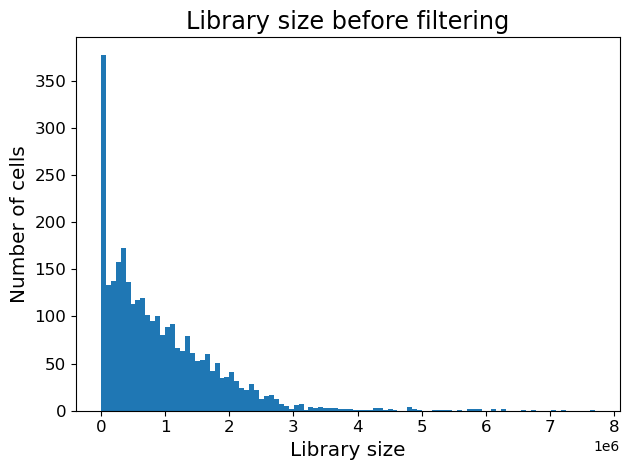

In [12]:
scprep.plot.plot_library_size(data, log=False, title='Library size before filtering')

<Axes: xlabel='Library size', ylabel='Number of cells'>

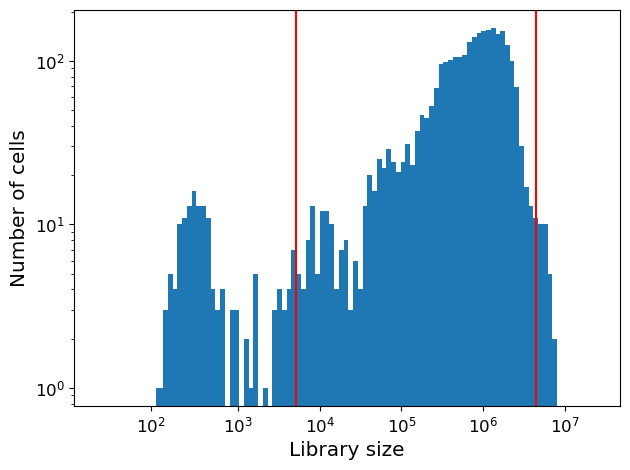

In [21]:
percentiles = (5, 99)

scprep.plot.plot_library_size(data, percentile=percentiles)

In [22]:
percentiles = (5, 99)
data, metadata = scprep.filter.filter_library_size(data, metadata, percentile=percentiles)

<b> Filtering by Gene Expression 

<Axes: title={'center': 'Gene capture before filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

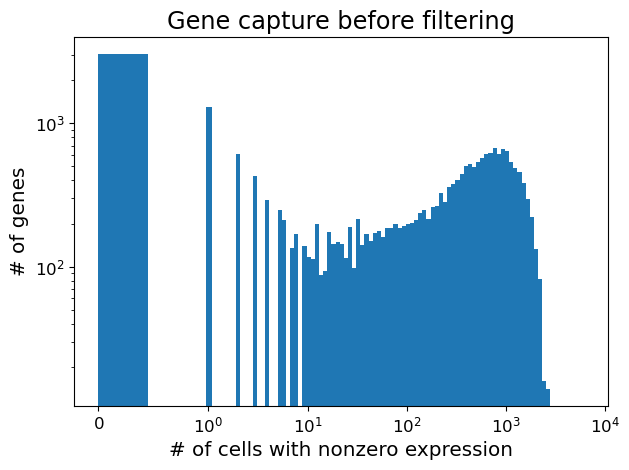

In [24]:
scprep.plot.histogram(scprep.measure.gene_capture_count(data), log=True,
                      title="Gene capture before filtering",
                     xlabel='# of cells with nonzero expression',
                     ylabel='# of genes')

<Axes: title={'center': 'Gene capture after filtering'}, xlabel='# of cells with nonzero expression', ylabel='# of genes'>

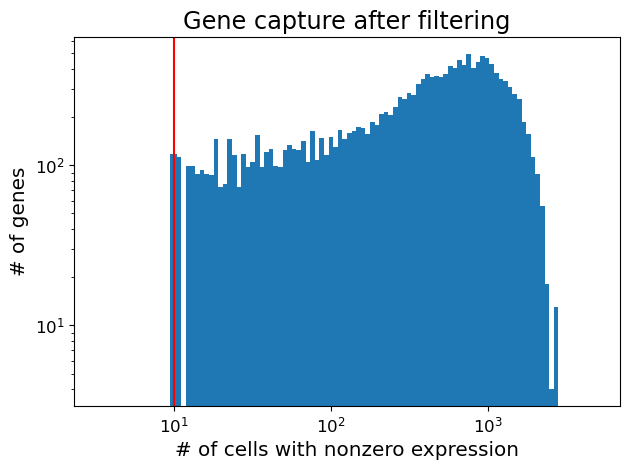

In [21]:
cutoff = 10
data = scprep.filter.filter_rare_genes(data, min_cells=cutoff)
scprep.plot.histogram(scprep.measure.gene_capture_count(data), 
                      cutoff = 10,
                      log=True,
                      title="Gene capture after filtering",
                      xlabel='# of cells with nonzero expression',
                      ylabel='# of genes')

<b> Normalization

<Axes: title={'center': 'Library size after normalization'}, xlabel='Library size', ylabel='Number of cells'>

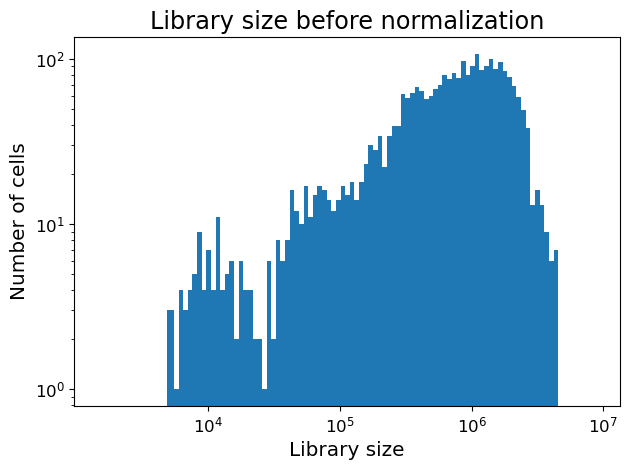

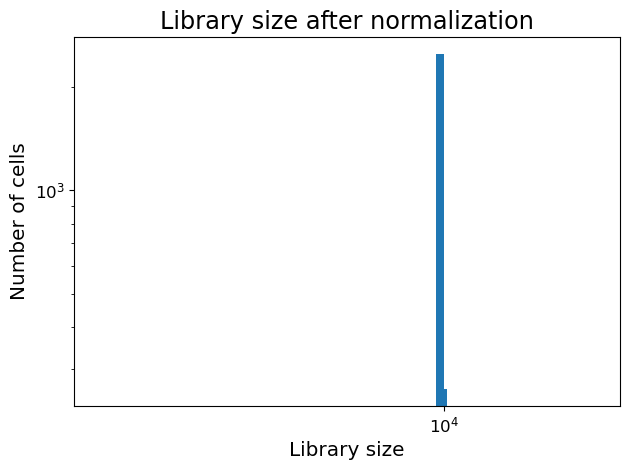

In [27]:
scprep.plot.plot_library_size(data, title='Library size before normalization')
data, metadata['library_size'] = scprep.normalize.library_size_normalize(data, return_library_size=True)
scprep.plot.plot_library_size(data, title='Library size after normalization')

<b> Gene Count Transformation

<Axes: title={'center': 'Mean Gene Expression (after transformation)'}, xlabel='Gene', ylabel='Expression'>

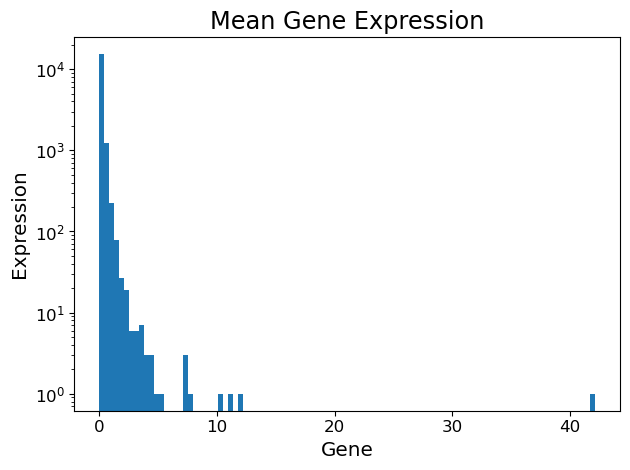

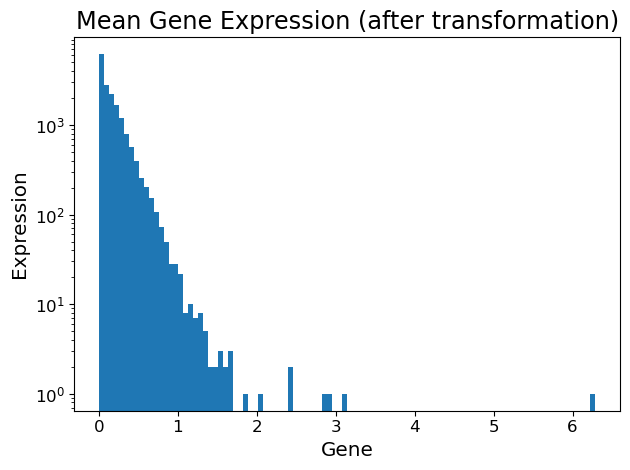

In [22]:
scprep.plot.histogram(data.mean(axis=0), log='y',
                      title= "Mean Gene Expression",
                      xlabel= "Gene",
                      ylabel= "Expression")

data = scprep.transform.sqrt(data)

scprep.plot.histogram(data.mean(axis=0), log='y',
                     title= "Mean Gene Expression (after transformation)",
                     xlabel= "Gene",
                     ylabel= "Expression")

In [30]:
# save 
data.to_pickle("data") #file.pickle.gz
metadata.to_pickle("metadata")  #file.pickle.gz

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scprep
%matplotlib inline

import umap
import os

In [5]:
#reload data
data = pd.read_pickle('data')
metadata = pd.read_pickle('metadata')

## <b> PCA

In [6]:
data_pca = scprep.reduce.pca(data, n_components=50, method='dense')

data_pca.head()

PC1        PC2        PC3        PC4  \
F18.MAA000377.3_9_M.1.1_liver -4.154154  -6.357295  -4.451874   4.660410   
J20.MAA000377.3_9_M.1.1_liver -5.466988  -7.861493  -1.988676   4.364722   
F19.MAA000377.3_9_M.1.1_liver -0.766596 -29.270115 -29.494689 -12.955954   
J21.MAA000377.3_9_M.1.1_liver  5.807766 -14.592616 -14.399320   0.179162   
F20.MAA000377.3_9_M.1.1_liver -4.813329 -11.658097 -10.250181   1.793626   

                                     PC5        PC6        PC7        PC8  \
F18.MAA000377.3_9_M.1.1_liver  24.238192   1.458735   0.618645  10.900694   
J20.MAA000377.3_9_M.1.1_liver  23.915714  -5.285399  -0.192952   9.551171   
F19.MAA000377.3_9_M.1.1_liver -13.659655   1.282132   1.668348   1.365167   
J21.MAA000377.3_9_M.1.1_liver  19.653691  16.729014  -1.957642  12.849071   
F20.MAA000377.3_9_M.1.1_liver  38.636010  -0.948064 -18.901656 -17.536868   

                                     PC9      PC10  ...      PC41      PC42  \
F18.MAA000377.3_9_M.1.1_liver  20.294231  5.465260  ...  3.977592 -2.622172   
J20.MAA000377.3_9_M.1.1_liver  19.909766  2.762664  ...  0.298800 -1.972290   
F19.MAA000377.3_9_M.1.1_liver   1.069720 -3.086560  ...  1.951289 -0.051999   
J21.MAA000377.3_9_M.1.1_liver  24.723812 -4.078344  ... -2.315813  1.879750   
F20.MAA000377.3_9_M.1.1_liver -10.260371 -3.718090  ... -2.591630 -1.479988   

                                   PC43      PC44      PC45      PC46  \
F18.MAA000377.3_9_M.1.1_liver -1.096458 -0.729520  1.449225 -0.388349   
J20.MAA000377.3_9_M.1.1_liver  1.181259 -2.066775  1.576620 -3.919025   
F19.MAA000377.3_9_M.1.1_liver  0.598602 -1.060814  2.316266  0.090352   
J21.MAA000377.3_9_M.1.1_liver  2.178187  0.067339 -0.034569 -1.211860   
F20.MAA000377.3_9_M.1.1_liver  0.287429 -1.508065 -2.999762 -4.030484   

                                   PC47      PC48      PC49      PC50  
F18.MAA000377.3_9_M.1.1_liver -0.836803  0.393681 -0.372399  2.443821  
J20.MAA000377.3_9_M.1.1_liver -0.306384 -1.409182 -0.832663 -0.308594  
F19.MAA000377.3_9_M.1.1_liver  0.498073 -0.273072 -2.344813 -0.252566  
J21.MAA000377.3_9_M.1.1_liver  0.087030 -3.083582 -4.415449  2.765734  
F20.MAA000377.3_9_M.1.1_liver  5.159553  0.869438  1.792403  0.842527  

[5 rows x 50 columns]

#### <b> Subtissue PCA

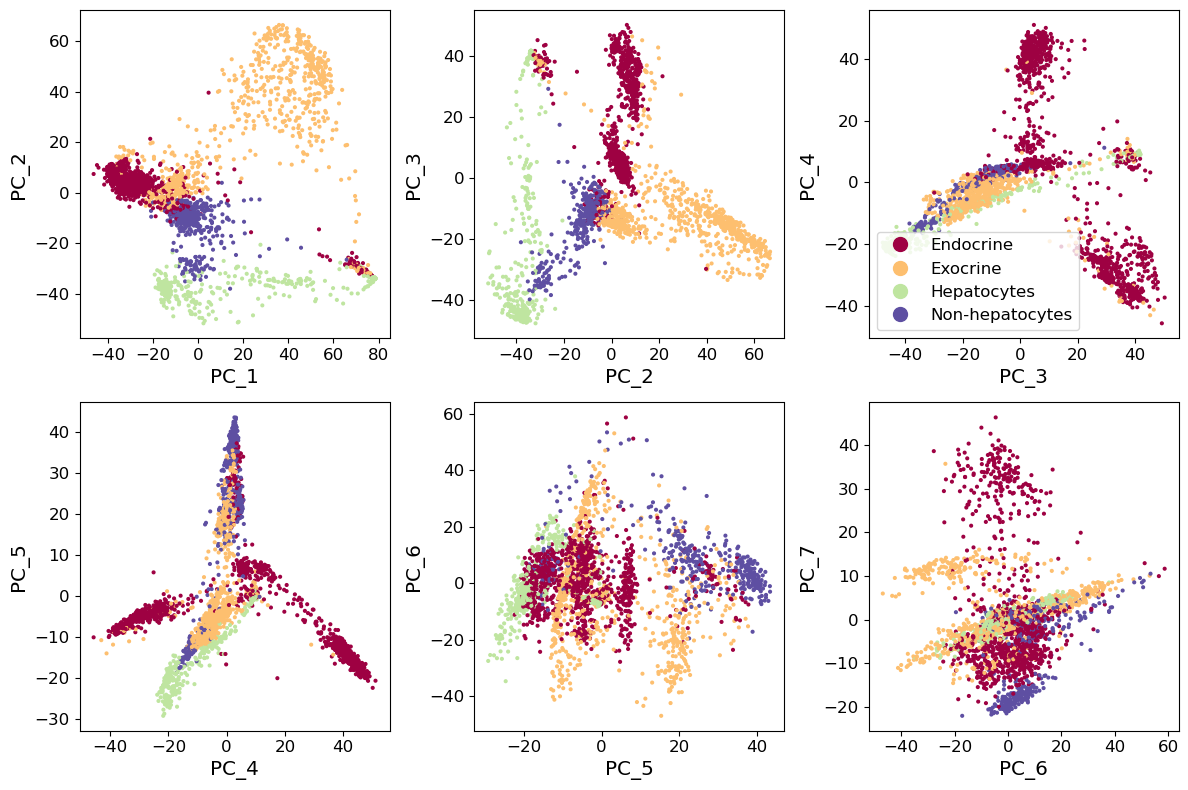

In [35]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['subtissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

#### <b> Tissue PCA

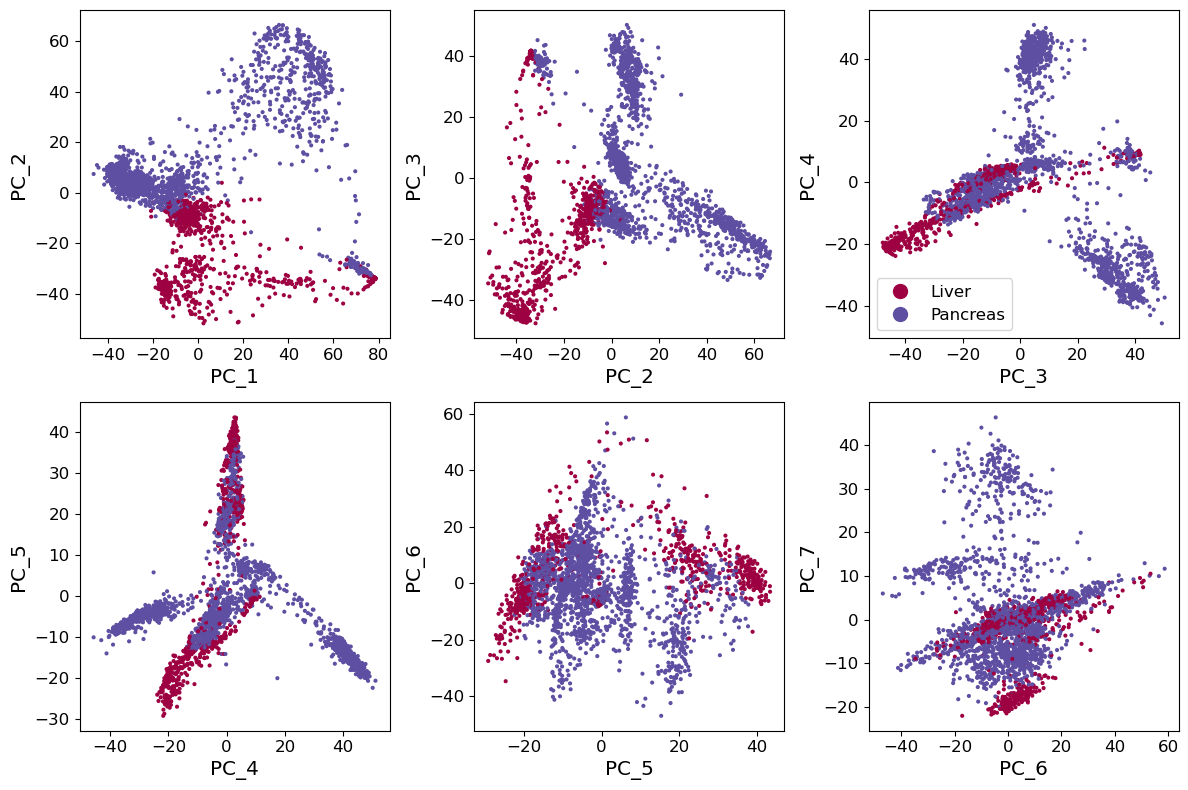

In [37]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['tissue'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

#### <b> Sex PCA

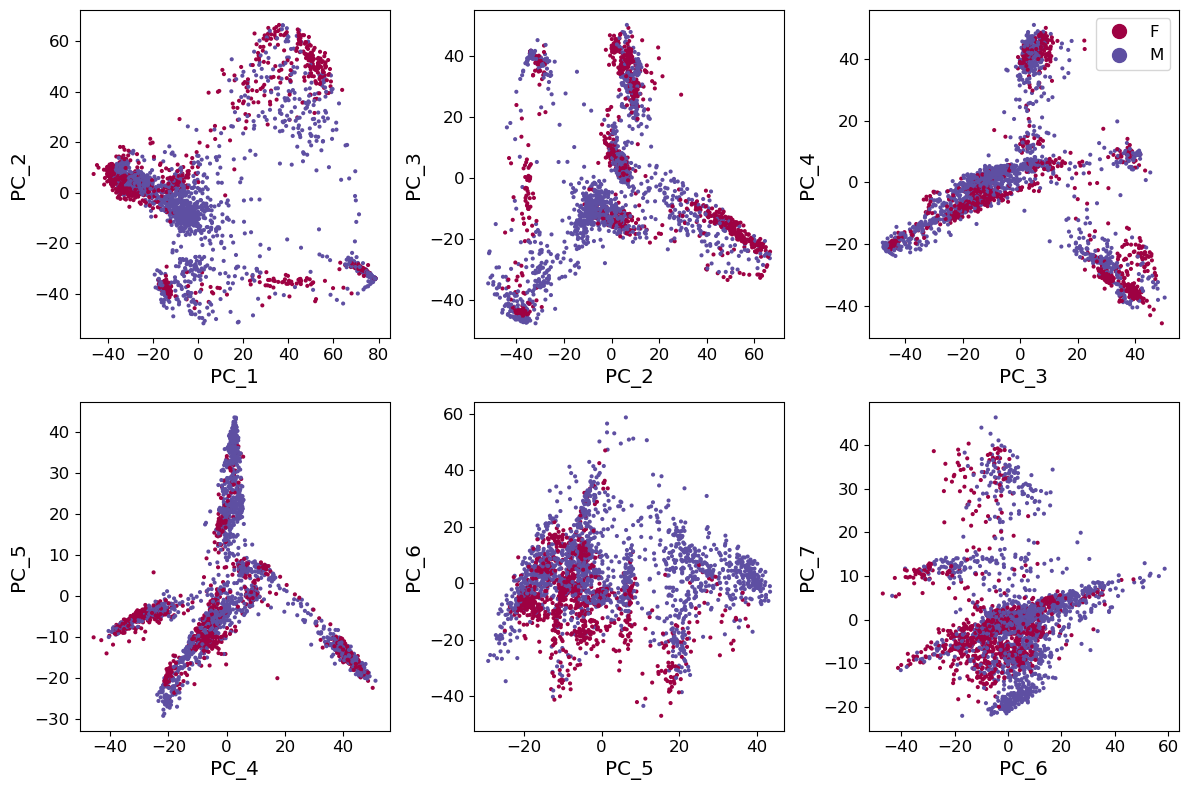

In [38]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    legend = True if i == 2 else False
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['mouse.sex'],
                        cmap='Spectral', ax=ax,
                        xlabel="PC_" + str(i+1), ylabel="PC_" + str(i+2), legend=legend)
fig.tight_layout() 

### <b> Expression of Genes on 1st Two PCs

Akt1 - (v-akt murine thymoma viral oncogene homolog 1) involved in insulin signaling

<Axes: title={'center': 'Akt1'}, xlabel='PC1', ylabel='PC2'>

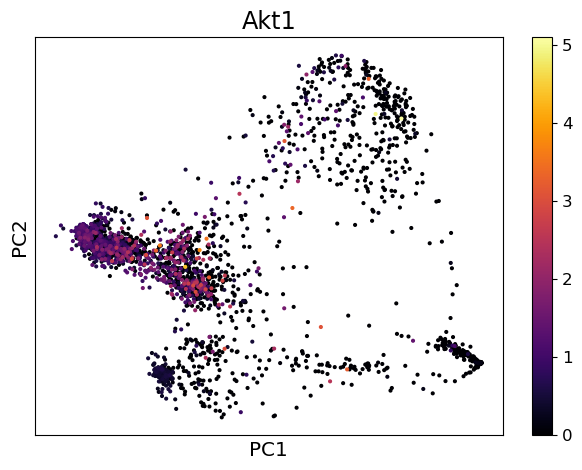

In [8]:
expression = scprep.select.select_cols(data, exact_word='Akt1')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Akt1', ticks=None, label_prefix='PC')

Hk2 - (hexokinase 2) Glycolysis

<Axes: title={'center': 'Hk2'}, xlabel='PC1', ylabel='PC2'>

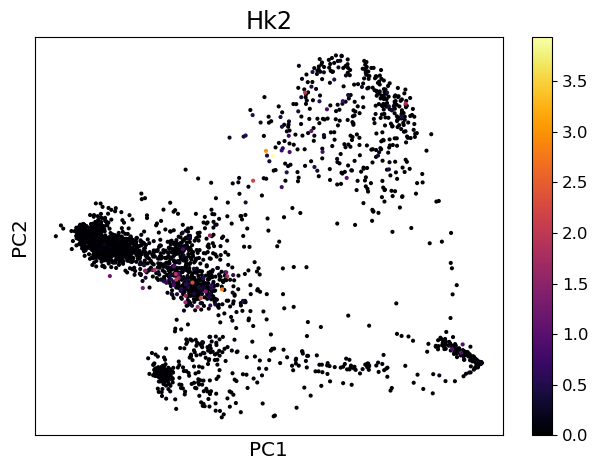

In [9]:
expression = scprep.select.select_cols(data, exact_word='Hk2')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Hk2', ticks=None, label_prefix='PC')

Alb - albumin

<Axes: title={'center': 'Alb'}, xlabel='PC1', ylabel='PC2'>

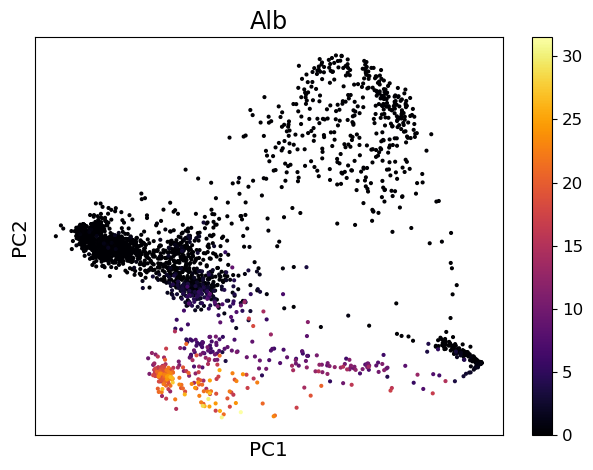

In [10]:
expression = scprep.select.select_cols(data, exact_word='Alb')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Alb', ticks=None, label_prefix='PC')

Gcg - glucagon 

<Axes: title={'center': 'Gcg'}, xlabel='PC1', ylabel='PC2'>

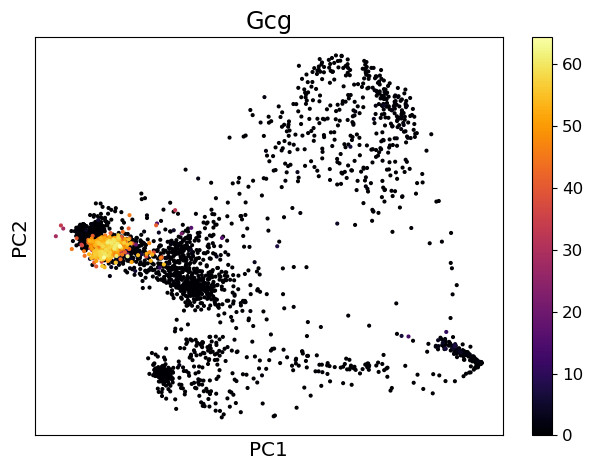

In [11]:
expression = scprep.select.select_cols(data, exact_word='Gcg')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Gcg', ticks=None, label_prefix='PC')

Ttr - transthyretin 

<Axes: title={'center': 'Ttr'}, xlabel='PC1', ylabel='PC2'>

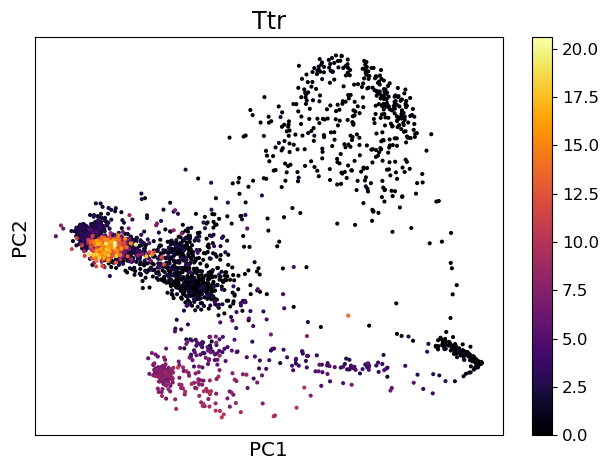

In [12]:
expression = scprep.select.select_cols(data, exact_word='Ttr')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Ttr', ticks=None, label_prefix='PC')

G6pc - (glucose-6-phosphate) - gluconeogenesis and glycogenolysis

<Axes: title={'center': 'G6pc'}, xlabel='PC1', ylabel='PC2'>

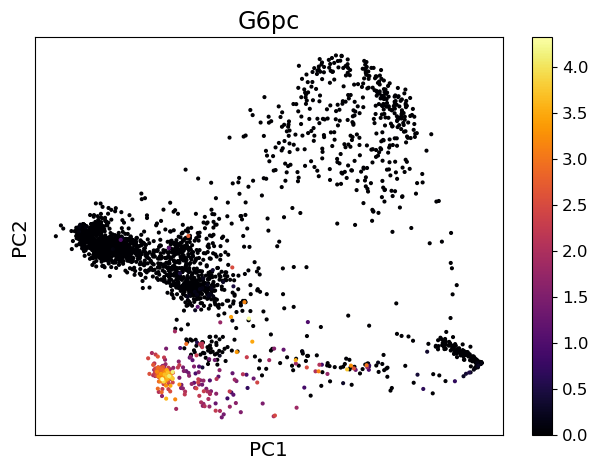

In [13]:
expression = scprep.select.select_cols(data, exact_word='G6pc')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='G6pc', ticks=None, label_prefix='PC')

Ins1 - insulin

<Axes: title={'center': 'Ins1'}, xlabel='PC1', ylabel='PC2'>

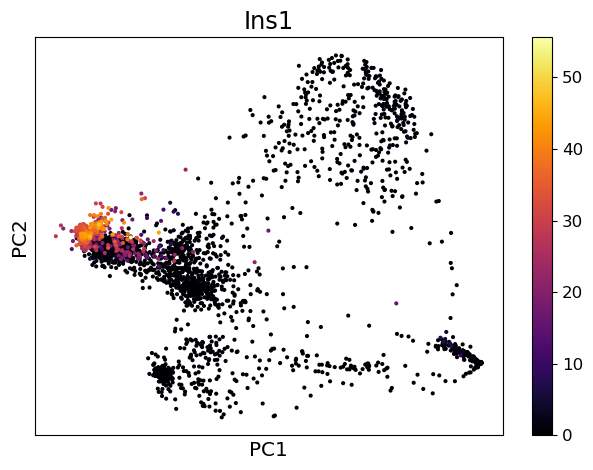

In [14]:
expression = scprep.select.select_cols(data, exact_word='Ins1')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Ins1', ticks=None, label_prefix='PC')

Pklr - pyruvate kinase - glycolysis

<Axes: title={'center': 'Pklr'}, xlabel='PC1', ylabel='PC2'>

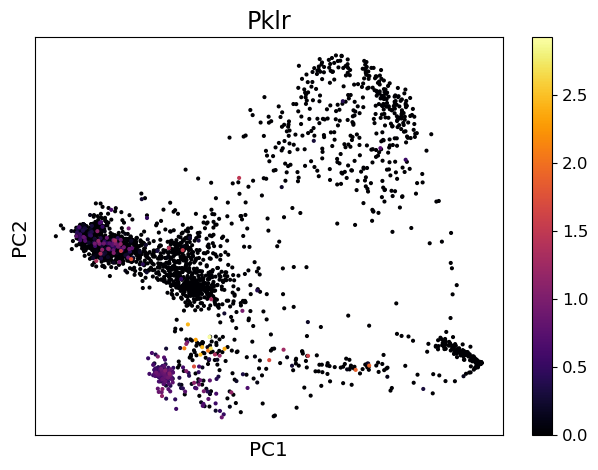

In [15]:
expression = scprep.select.select_cols(data, exact_word='Pklr')

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                      title='Pklr', ticks=None, label_prefix='PC')

## <b> UMAP

In [7]:
import umap.umap_ as umap
data_umap = umap.UMAP().fit_transform(data_pca.iloc[:,:50])

data_umap = pd.DataFrame(data_umap, index = data.index)

%matplotlib inline

#### <b> Subtissue

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

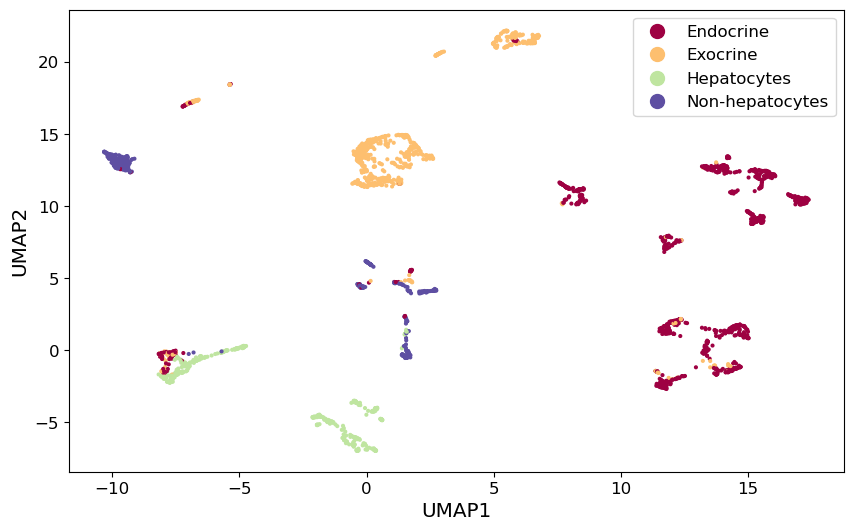

In [9]:
fig, ax = plt.subplots(figsize=(10,6))

scprep.plot.scatter2d( 
  data_umap, cmap='Spectral',
  c=metadata['subtissue'], ax=ax,
  label_prefix="UMAP"
)

#### <b> Tissue

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

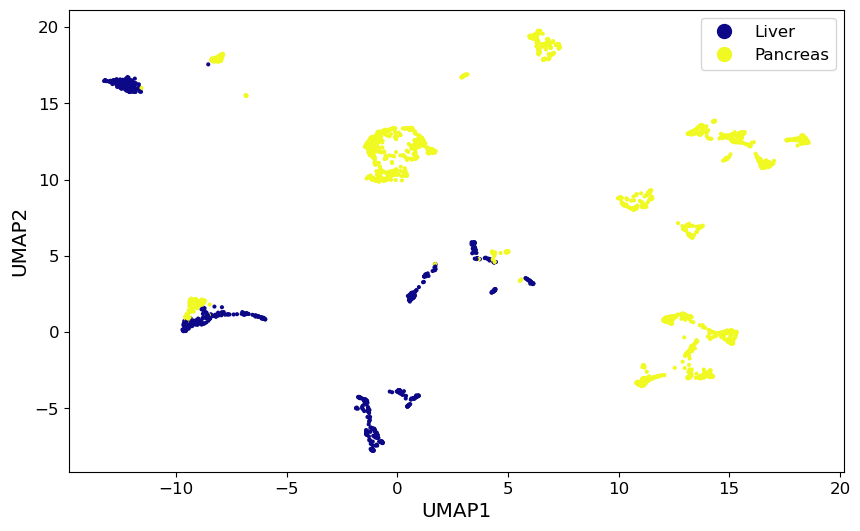

In [44]:
fig, ax = plt.subplots(figsize=(10,6)) ## feel free to adjust size
scprep.plot.scatter2d( 
  data_umap, cmap='plasma',
  c=metadata['tissue'], ax=ax,
  label_prefix="UMAP"
)

#### <b> Sex

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

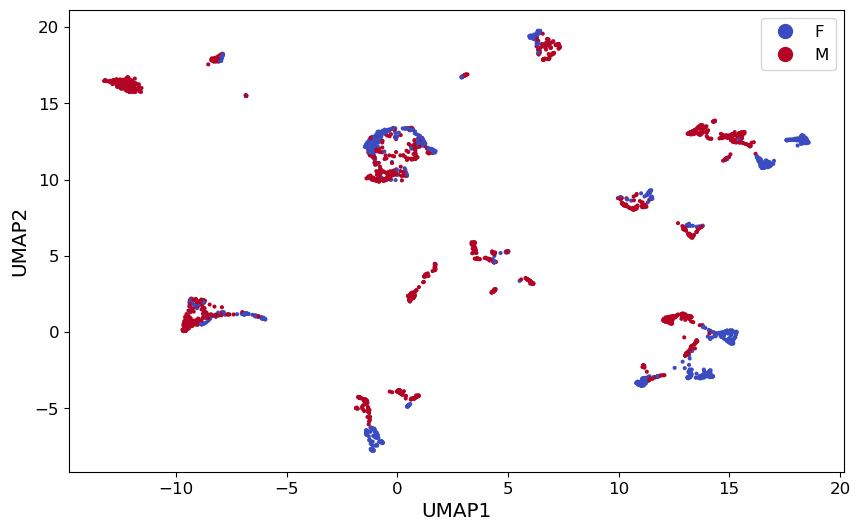

In [45]:
fig, ax = plt.subplots(figsize=(10,6)) ## feel free to adjust size
scprep.plot.scatter2d( 
  data_umap, cmap='coolwarm',
  c=metadata['mouse.sex'], ax=ax,
  label_prefix="UMAP"
)

### <b> Marker Gene Comparison

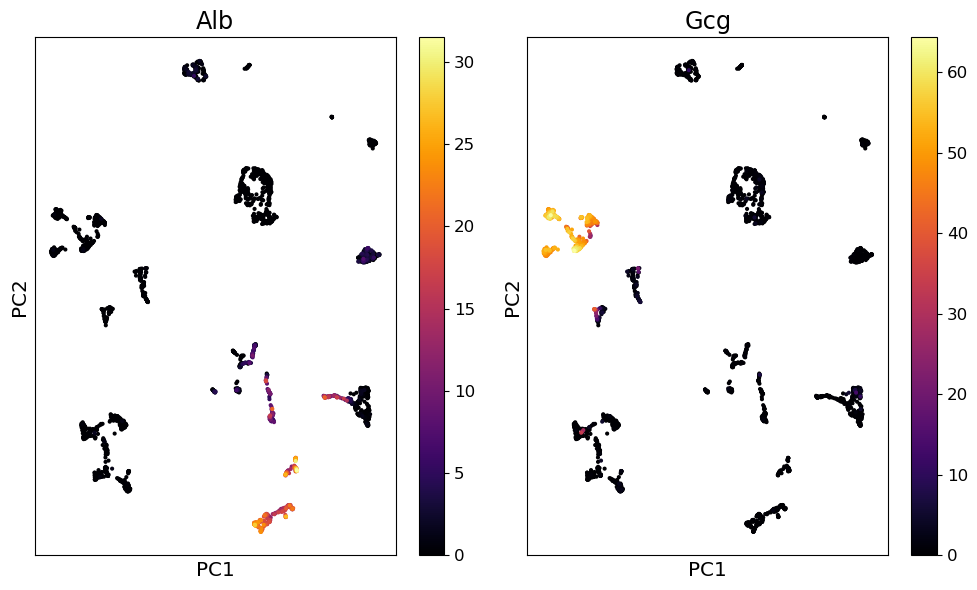

In [18]:
genes_for_plotting = ['Alb', 'Gcg']

fig, axes = plt.subplots(1, 2, figsize=(10,6))

for gene, ax in zip(genes_for_plotting, axes.flatten()):
    expression = data[gene]
    sort_index = expression.sort_values().index

    scprep.plot.scatter2d(data_umap.loc[sort_index], c=expression.loc[sort_index],
                          shuffle=False, title=gene, 
                          label_prefix='PC', ticks=None, ax=ax)
                          
fig.tight_layout()

## <b> Clustering

In [8]:
%%bash

# run everytime
pip install scprep umap-learn phenograph tasklogger graphtools

  Using cached PhenoGraph-1.5.7-py3-none-any.whl (159 kB)
  Using cached tasklogger-1.2.0-py3-none-any.whl (14 kB)
  Using cached graphtools-1.5.3-py3-none-any.whl (45 kB)
  Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)
  Using cached Deprecated-1.2.15-py2.py3-none-any.whl (9.9 kB)
  Using cached PyGSP-0.5.1-py2.py3-none-any.whl (1.8 MB)
  Using cached igraph-0.11.8-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached wrapt-1.17.0-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Using cached texttable-1.7.0-py2.py3-none-any.whl (10 kB)


In [9]:
import pandas as pd
import numpy as np
import scprep, umap 
import sklearn
import sklearn.cluster
import sklearn.manifold
import graphtools as gt
import phenograph
import matplotlib.pyplot as plt
import tasklogger

%matplotlib inline

In [11]:
with tasklogger.log_task("phenograph"):
    phenograph_clusters, _, _ = phenograph.cluster(data_pca)

with tasklogger.log_task("KMeans"):
    kmeans_clusters = sklearn.cluster.KMeans(n_clusters = 10).fit_predict(data_pca)

import graphtools as gt
G = gt.Graph(data_pca)
G_igraph = G.to_igraph()

with tasklogger.log_task("Spectral clustering"):
     spec_op = sklearn.cluster.SpectralClustering(n_clusters = 15, affinity='precomputed')
     spectral_clusters = spec_op.fit_predict(G.K)


Calculating phenograph...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.1859605312347412 seconds
Jaccard graph constructed in 0.9071989059448242 seconds
Wrote graph to binary file in 0.10620379447937012 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.937164
Louvain completed 21 runs in 0.7499902248382568 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 2.1588244438171387 seconds
Calculated phenograph in 2.16 seconds.
Calculating KMeans...


/srv/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculated KMeans in 1.60 seconds.
Calculating Spectral clustering...


/srv/conda/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Calculated Spectral clustering in 2.88 seconds.


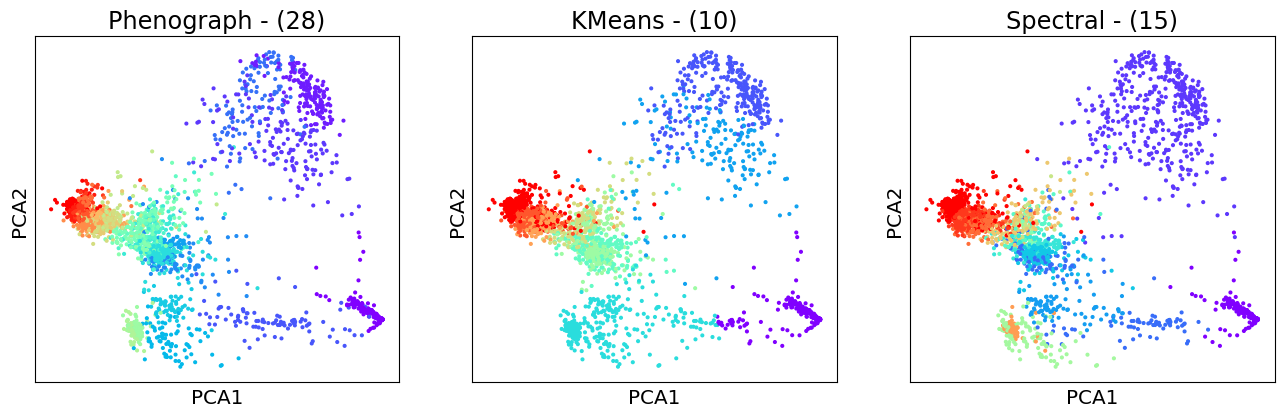

In [12]:
clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters,
               'Spectral':spectral_clusters}

for alg in clusterings:
    cl_nu = scprep.utils.sort_clusters_by_values(clusterings[alg], -data_pca.iloc[:,0])
    clusterings[alg] = cl_nu


fig, axes = plt.subplots(1,3, figsize=(16,16), subplot_kw={'aspect':'equal'})

for ax, algorithm in zip(axes.flatten(), clusterings):
  scprep.plot.scatter2d(data_pca, c=clusterings[algorithm], cmap=plt.cm.rainbow,
                        title='{} - ({})'.format(algorithm, len(np.unique(clusterings[algorithm]))),
                        ticks=False, label_prefix="PCA", legend=False, discrete=True,
                        ax=ax)

### <b> Choosing Clusters

In [13]:
from sklearn.model_selection import train_test_split
from itertools import combinations
from scipy import sparse

def get_comemberships(dat, n_clusters, model, kwargs={}):
  model = model(n_clusters=n_clusters, **kwargs)
  model.fit(dat)

  labels = model.predict(dat)
  comember = labels_to_mat(labels, n_clusters, N=dat.shape[0])

  return comember, model

def labels_to_mat(labels, n_clusters, N):
 

  comember = np.zeros((N, N), dtype=bool)
  for i in range(n_clusters):
    match_idx = np.where(labels==i)[0]

    match_idx = iter(combinations(match_idx, 2))
    for (j,k) in match_idx:
      comember[j,k] = True

  comember = np.maximum(comember, comember.transpose())
  comember[np.diag_indices_from(comember)] = True

  comember = sparse.csr_matrix(comember)
  return comember

def prediction_strength(full_dat, n_clusters, n_CV=3,
                        verbose=False, model=sklearn.cluster.KMeans,
                        kwargs={}):
  test_size = 1./n_CV
  res = []
  for i in range(n_CV):
    train_dat, test_dat = train_test_split(full_dat, test_size=test_size)
    N_test = test_dat.shape[0]
    __, train_model  = get_comemberships(train_dat, n_clusters, model=model, kwargs=kwargs)
    ground_truth, __ = get_comemberships(test_dat, n_clusters, model=model, kwargs=kwargs)

    pred_labels      = labels_to_mat(train_model.predict(test_dat), n_clusters, N_test)

    match_count      = ground_truth.minimum(pred_labels).sum()
    res.append(match_count/(N_test**2))

  if verbose:
    print(res)

  return np.mean(res)

In [14]:
start = 2
end   = 10

pred_strengths = []
for i in range(start, end):
  pred_strengths.append(prediction_strength(full_dat=data,
                                            n_clusters=i, n_CV=3,
                        verbose=False, model=sklearn.cluster.KMeans,
                        kwargs={}))

/srv/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


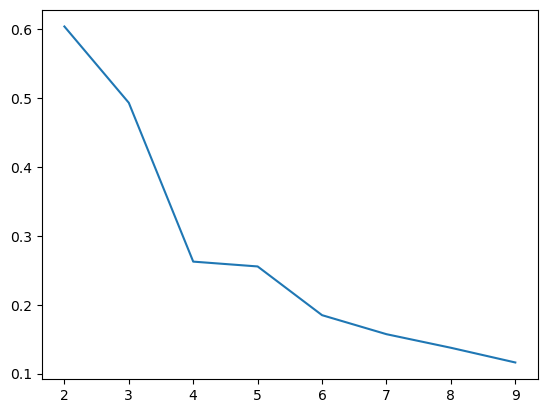

In [15]:
n_clusters = list(range(2, end))
plt.plot(n_clusters, pred_strengths)
plt.show()

/srv/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


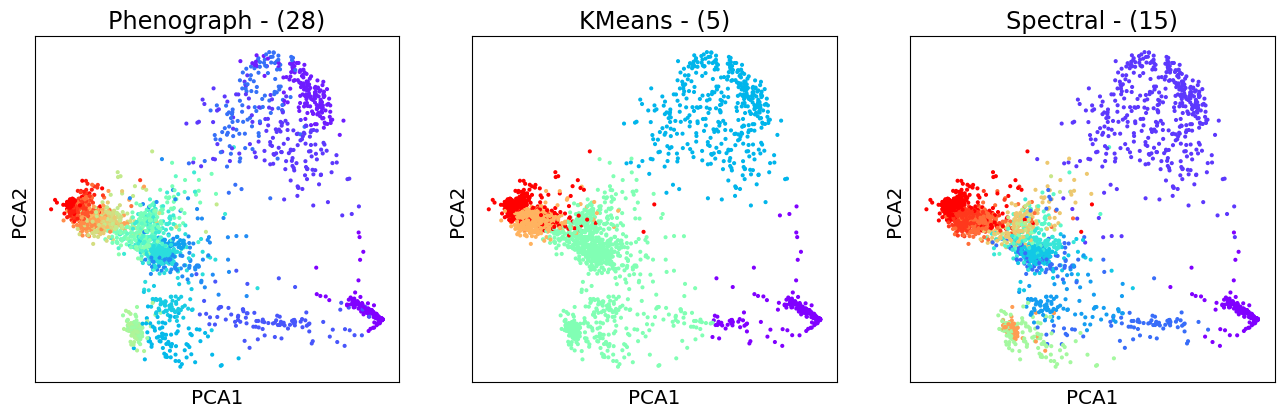

In [18]:
optimal_n_clusters = 5

clusterings = {'Phenograph':phenograph_clusters,
               'KMeans':kmeans_clusters,
               'Spectral':spectral_clusters}  

kmeans_clusters = sklearn.cluster.KMeans(n_clusters=optimal_n_clusters).fit_predict(data_pca)

clusterings['KMeans'] = kmeans_clusters


for alg in clusterings:
    cl_nu = scprep.utils.sort_clusters_by_values(clusterings[alg], -data_pca.iloc[:,0])
    clusterings[alg] = cl_nu

fig, axes = plt.subplots(1,3, figsize=(16,16), subplot_kw={'aspect':'equal'})

for ax, algorithm in zip(axes.flatten(), clusterings):
  scprep.plot.scatter2d(data_pca, c=clusterings[algorithm], cmap=plt.cm.rainbow,
                        title='{} - ({})'.format(algorithm, len(np.unique(clusterings[algorithm]))),
                        ticks=False, label_prefix="PCA", legend=False, discrete=True,
                        ax=ax)

### <b> Comparing Clustering Methods

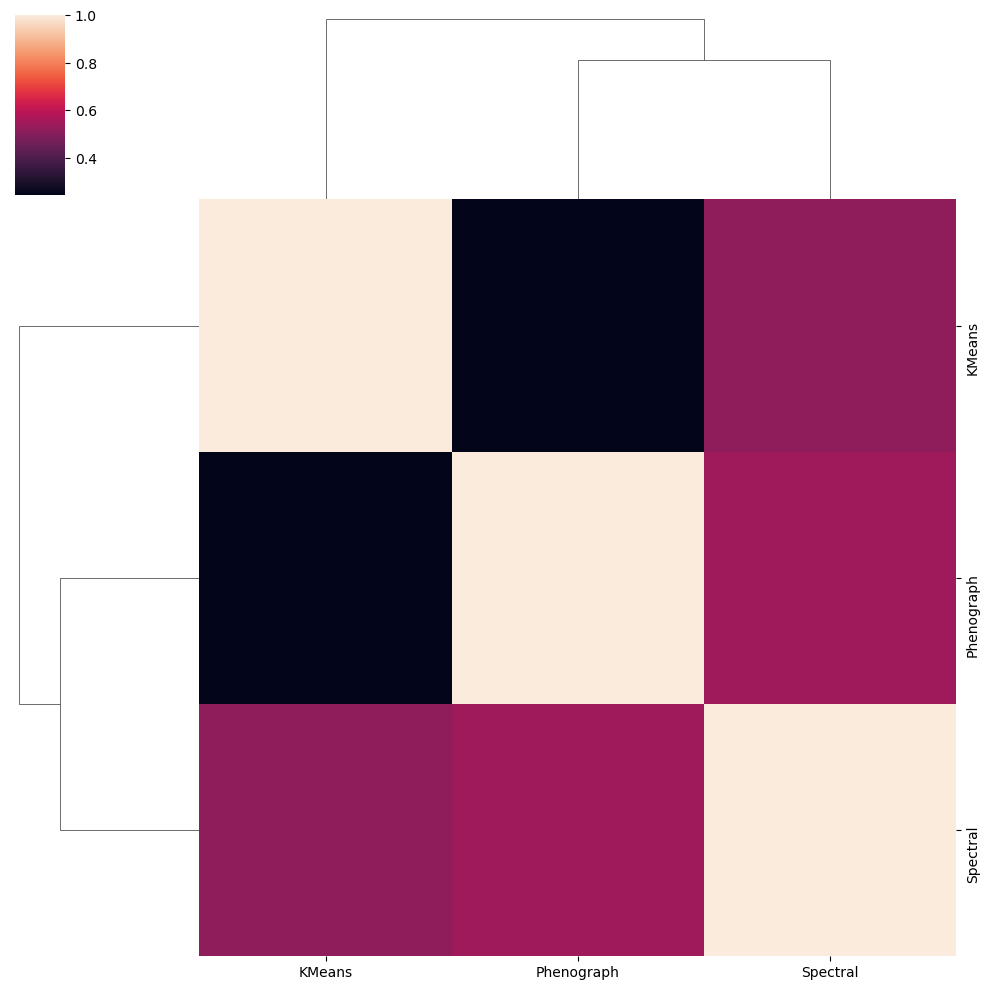

In [17]:
all_clusterings = []
all_algorithms = list(clusterings.keys())
for algo in all_algorithms:
    all_clusterings.append(clusterings[algo])
all_clusterings = np.vstack(all_clusterings)


from scipy.spatial.distance import pdist, squareform
cluster_similarities = squareform(pdist(all_clusterings, metric=sklearn.metrics.adjusted_rand_score))
# squareform assumes diagonals will be 0, but they're actually 1 because this is a similarity metric
# so we need to add 1's on the diagonal with np.eye()
cluster_similarities = cluster_similarities + np.eye(3)


import seaborn as sns
sns.clustermap(cluster_similarities, xticklabels=all_algorithms, yticklabels=all_algorithms)
plt.show()

## <b> Analysis 

In [18]:
gene_list = ['Akt1', 'Hk2', 'Gcg', 'Ttr', 'Ins1', 'Pklr', 'Alb', 'G6pc', 'Hgf']

data[gene_list]

Akt1       Hk2       Gcg       Ttr  \
F18.MAA000377.3_9_M.1.1_liver      0.000000  0.000000  0.000000  0.167980   
J20.MAA000377.3_9_M.1.1_liver      2.544675  0.000000  0.000000  0.000000   
F19.MAA000377.3_9_M.1.1_liver      0.000000  0.000000  0.000000  3.527956   
J21.MAA000377.3_9_M.1.1_liver      0.616781  0.000000  0.000000  0.699363   
F20.MAA000377.3_9_M.1.1_liver      2.363825  0.000000  0.000000  1.279577   
...                                     ...       ...       ...       ...   
I9.MAA001868.3_38_F.1.1_pancreas   0.000000  0.641478  0.000000  0.000000   
K10.MAA001868.3_38_F.1.1_pancreas  0.000000  0.000000  0.398679  0.000000   
M19.MAA001868.3_38_F.1.1_pancreas  0.000000  0.000000  0.576902  0.203966   
O9.MAA001868.3_38_F.1.1_pancreas   0.000000  0.000000  0.000000  0.000000   
P16.MAA001868.3_38_F.1.1_pancreas  0.000000  0.000000  1.200159  0.759047   

                                       Ins1      Pklr       Alb      G6pc  \
F18.MAA000377.3_9_M.1.1_liver      0.000000  0.000000  0.000000  0.000000   
J20.MAA000377.3_9_M.1.1_liver      0.000000  0.000000  0.000000  0.000000   
F19.MAA000377.3_9_M.1.1_liver      0.000000  2.682614  5.639828  0.000000   
J21.MAA000377.3_9_M.1.1_liver      0.000000  0.000000  5.676871  0.000000   
F20.MAA000377.3_9_M.1.1_liver      0.000000  0.000000  3.130161  0.161211   
...                                     ...       ...       ...       ...   
I9.MAA001868.3_38_F.1.1_pancreas   0.000000  0.000000  0.000000  0.000000   
K10.MAA001868.3_38_F.1.1_pancreas  0.281908  0.000000  0.000000  0.000000   
M19.MAA001868.3_38_F.1.1_pancreas  0.000000  0.000000  0.000000  0.000000   
O9.MAA001868.3_38_F.1.1_pancreas   0.000000  0.000000  0.000000  0.000000   
P16.MAA001868.3_38_F.1.1_pancreas  4.157474  0.000000  0.000000  0.000000   

                                        Hgf  
F18.MAA000377.3_9_M.1.1_liver      0.000000  
J20.MAA000377.3_9_M.1.1_liver      0.000000  
F19.MAA000377.3_9_M.1.1_liver      0.000000  
J21.MAA000377.3_9_M.1.1_liver      0.000000  
F20.MAA000377.3_9_M.1.1_liver      0.558453  
...                                     ...  
I9.MAA001868.3_38_F.1.1_pancreas   0.000000  
K10.MAA001868.3_38_F.1.1_pancreas  0.000000  
M19.MAA001868.3_38_F.1.1_pancreas  0.000000  
O9.MAA001868.3_38_F.1.1_pancreas   0.000000  
P16.MAA001868.3_38_F.1.1_pancreas  0.000000  

[2764 rows x 9 columns]

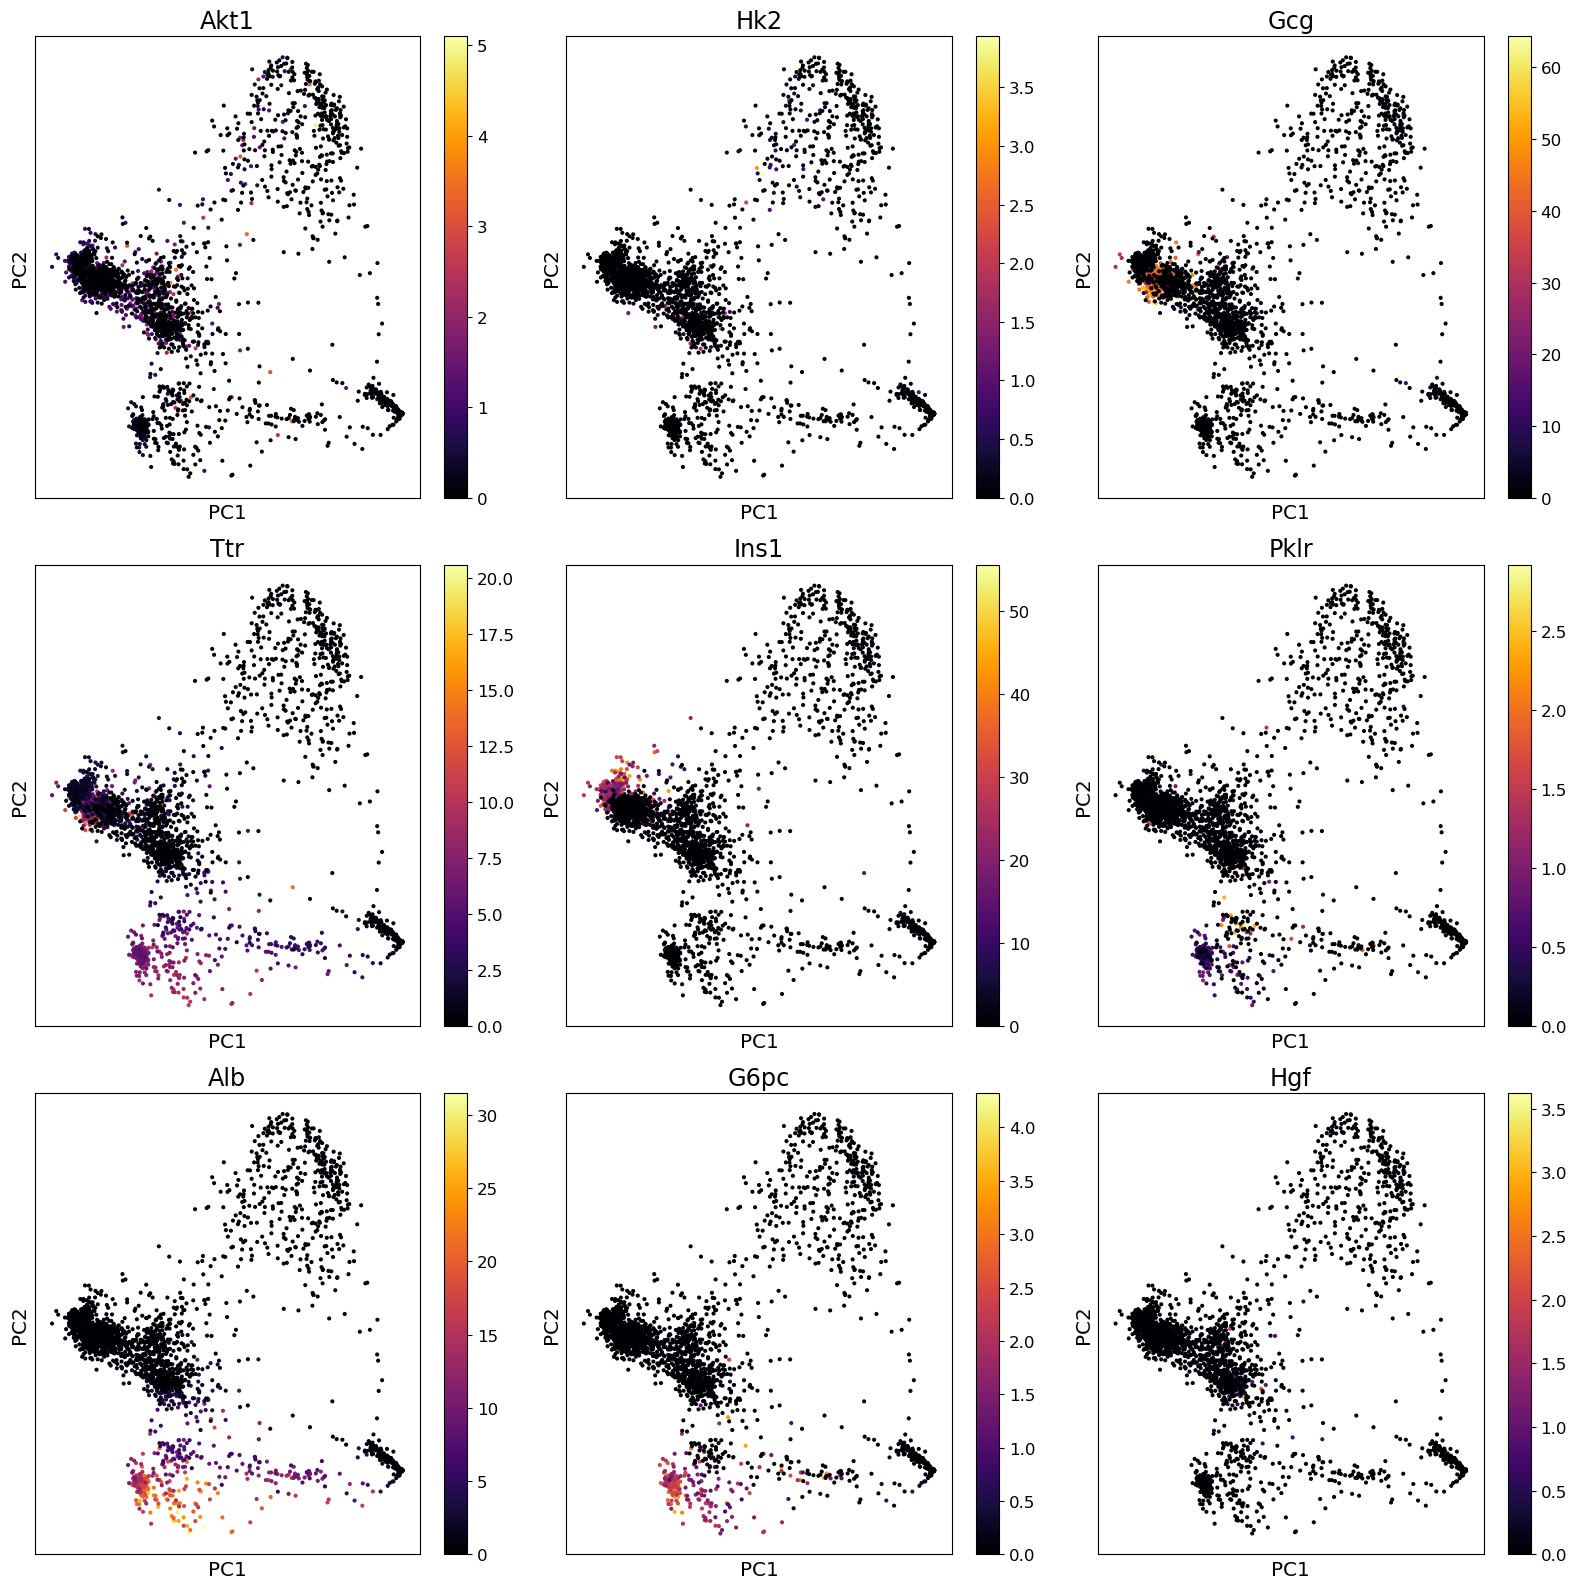

In [19]:
gene_list = ['Akt1', 'Hk2', 'Gcg', 'Ttr', 'Ins1', 'Pklr', 'Alb', 'G6pc', 'Hgf']

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

for gene, ax in zip(gene_list, axes.flatten()):
    if gene not in data.columns:
        print(f"Warning: {gene} not found in the dataset.")
        ax.axis('off')  
        continue

    expression = data[gene]
    sorted_index = expression.sort_values(ascending=False).index

    scprep.plot.scatter2d(
        data_pca.loc[sorted_index],  
        c=expression.loc[sorted_index],  
        shuffle=False,
        title=gene,  
        ticks=None,
        label_prefix='PC',
        ax=ax  
    )

fig.tight_layout()
plt.show()

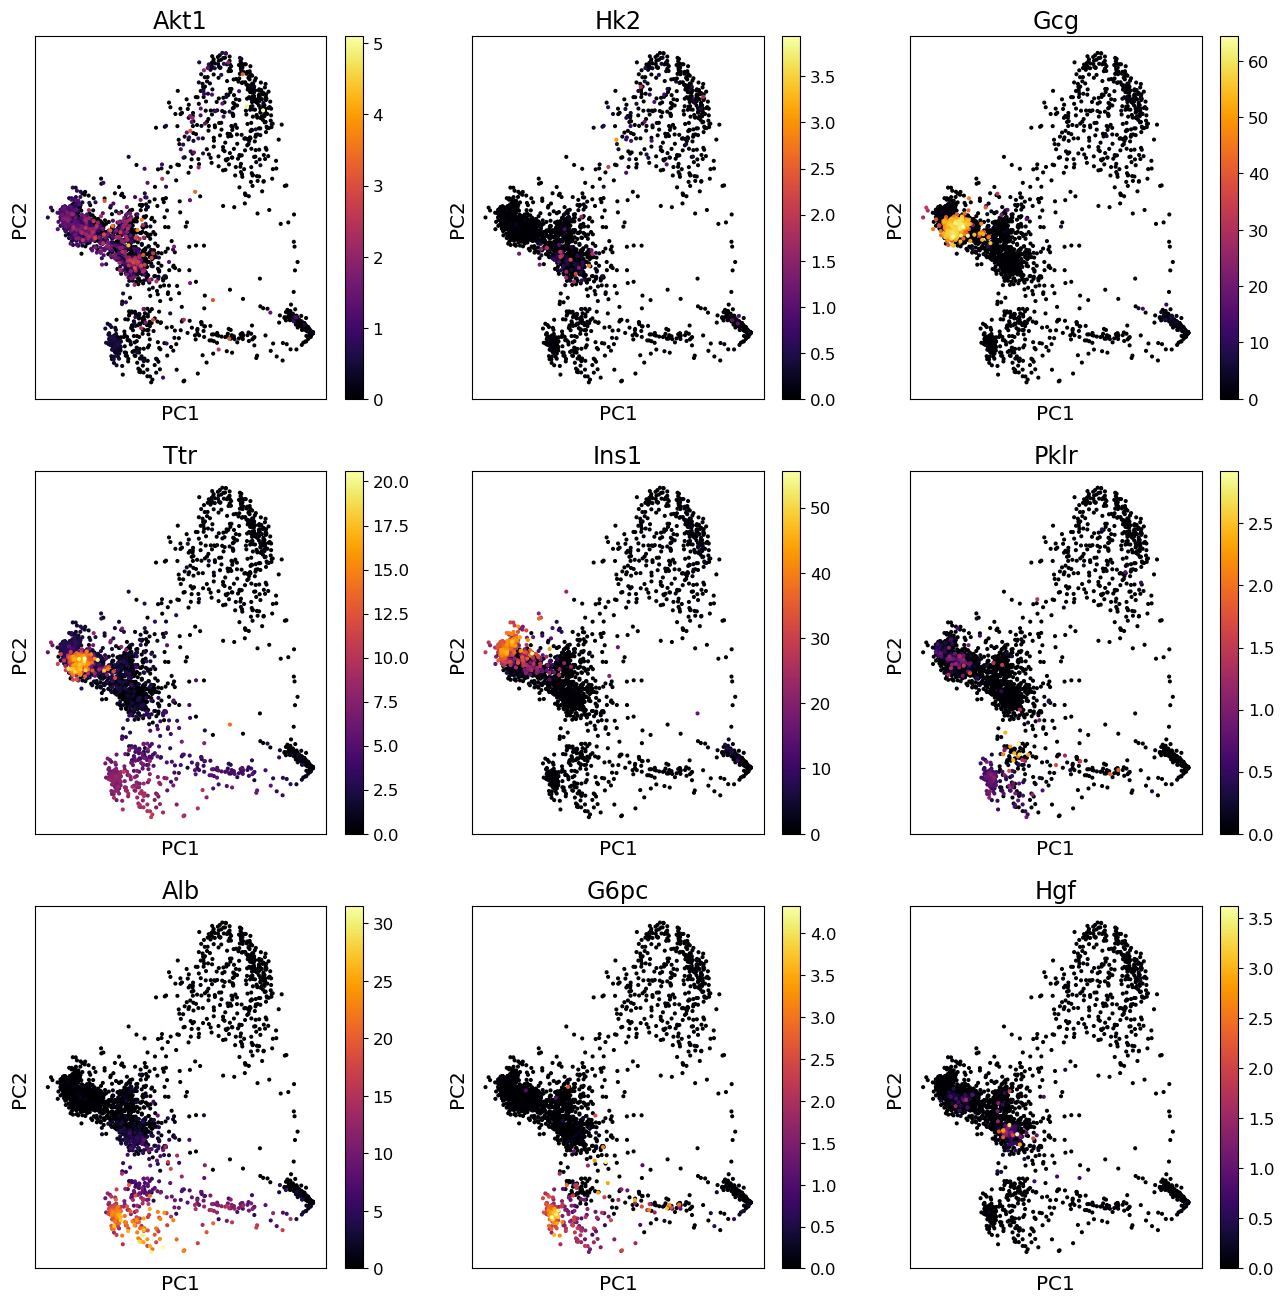

In [20]:
gene_list = ['Akt1', 'Hk2', 'Gcg', 'Ttr', 'Ins1', 'Pklr', 'Alb', 'G6pc', 'Hgf']
 
fig, axes = plt.subplots(3,3, figsize=(16,16))

    
for gene, ax in zip(gene_list, axes.flatten()):
    expression = data[gene]
    sorted_index = expression.sort_values().index
    
    scprep.plot.scatter2d(data_pca.loc[sorted_index], c=expression.loc[sorted_index], shuffle=False,
                       title=gene, ticks=None, label_prefix='PC', ax= ax)

### <b> Jitterplot

In [20]:
clusters = clusterings['KMeans']

<Axes: title={'center': 'KMeans - (5)'}, xlabel='PCA1', ylabel='PCA2'>

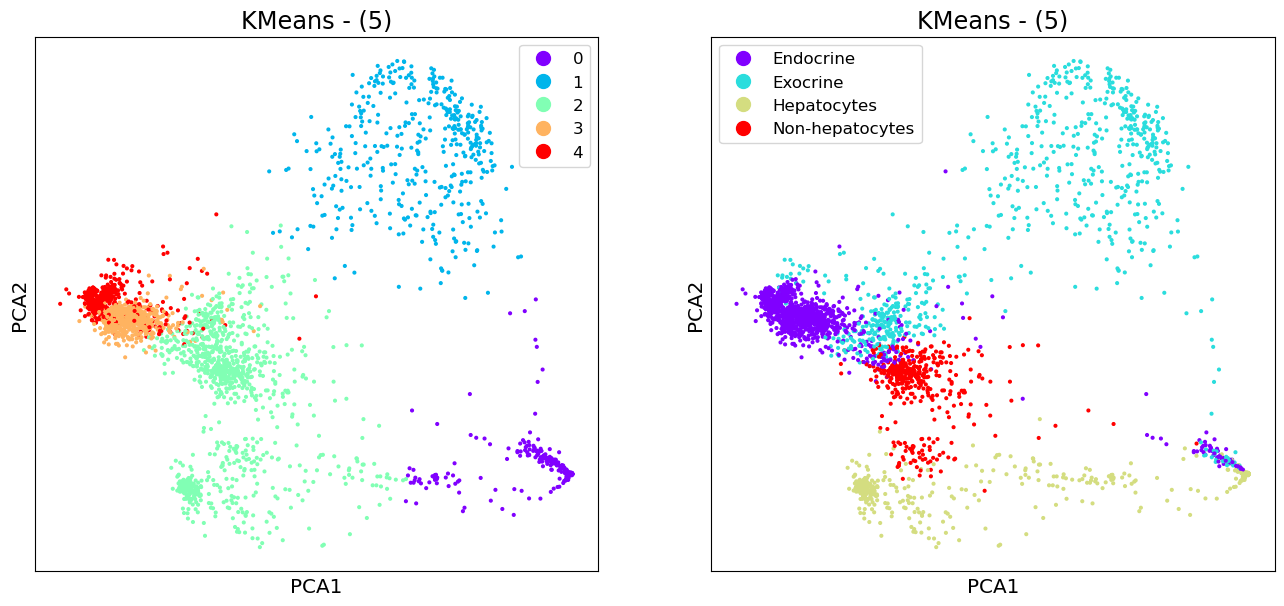

In [21]:
fig, axes = plt.subplots(1,2, figsize=(16,16), subplot_kw={'aspect':'equal'})

scprep.plot.scatter2d(data_pca, c=clusters, cmap=plt.cm.rainbow,
                       title='{} - ({})'.format('KMeans', len(np.unique(clusters))),
                       ticks=False, label_prefix="PCA", legend=True, discrete=True,
                       ax=axes[0])



scprep.plot.scatter2d(data_pca, c=metadata['subtissue'], cmap=plt.cm.rainbow,
                       title='{} - ({})'.format('KMeans', len(np.unique(clusters))),
                       ticks=False, label_prefix="PCA", legend=True, discrete=True,
                       ax=axes[1])

<Axes: title={'center': 'Hgf'}, ylabel='Hgf'>

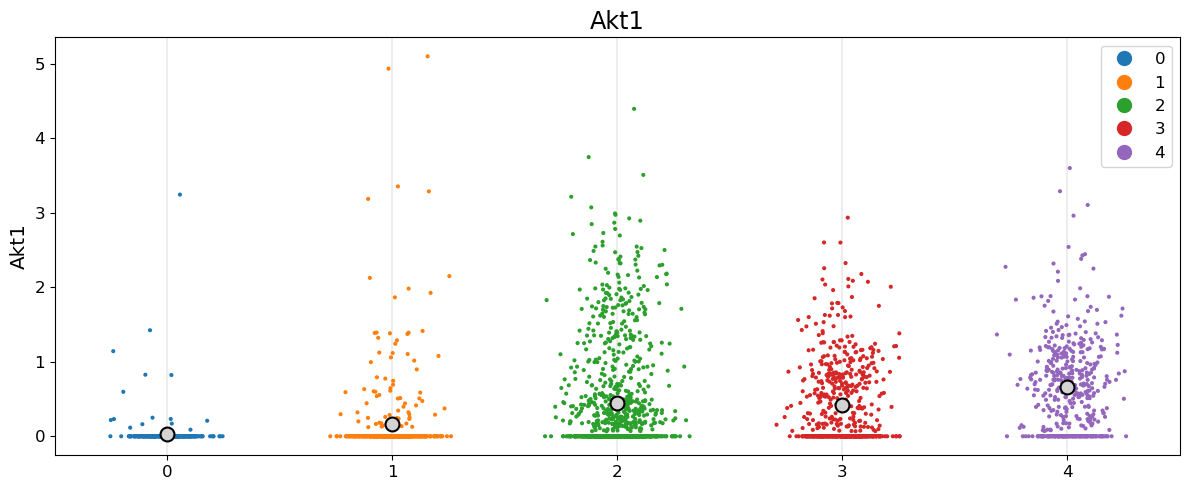

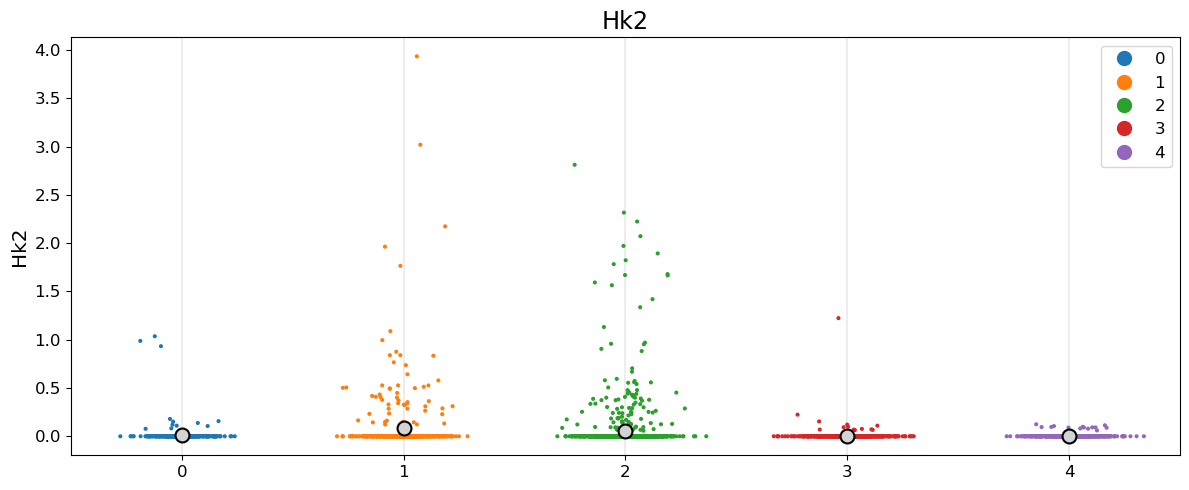

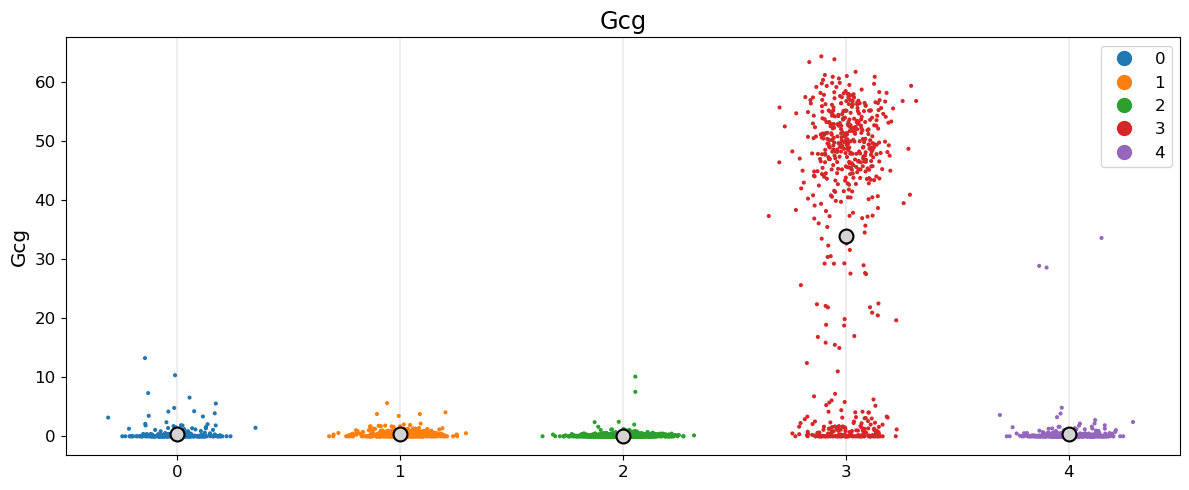

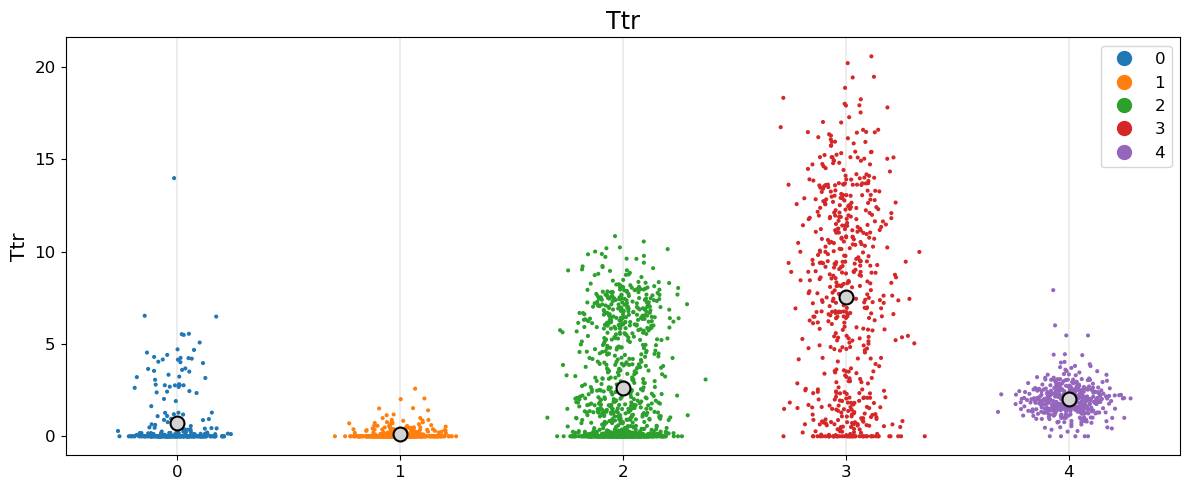

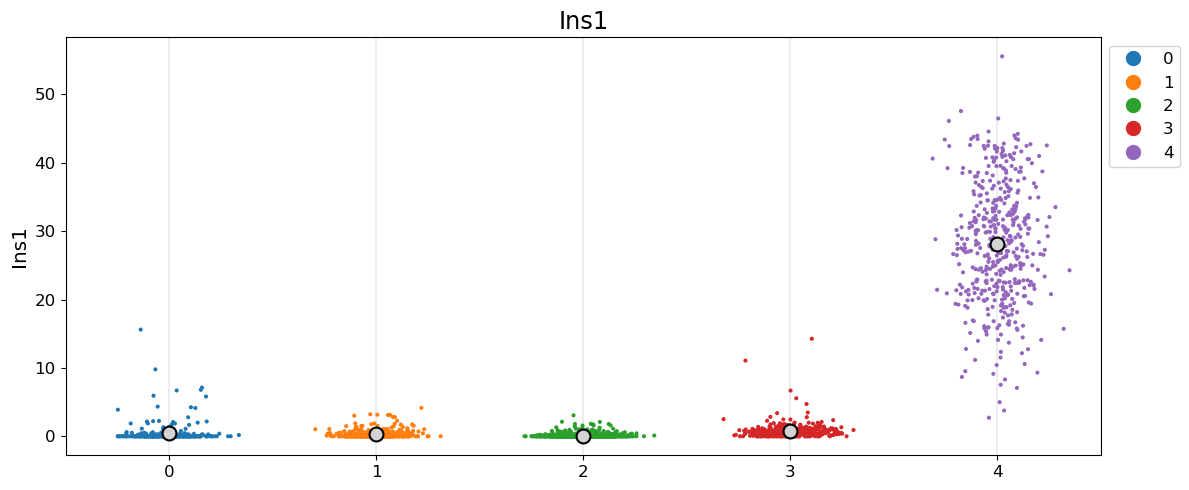

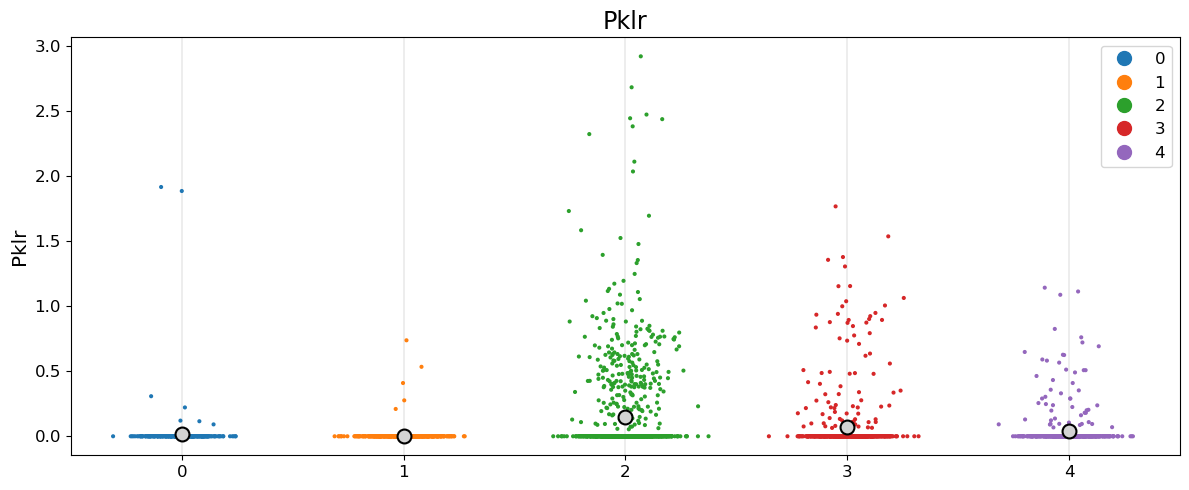

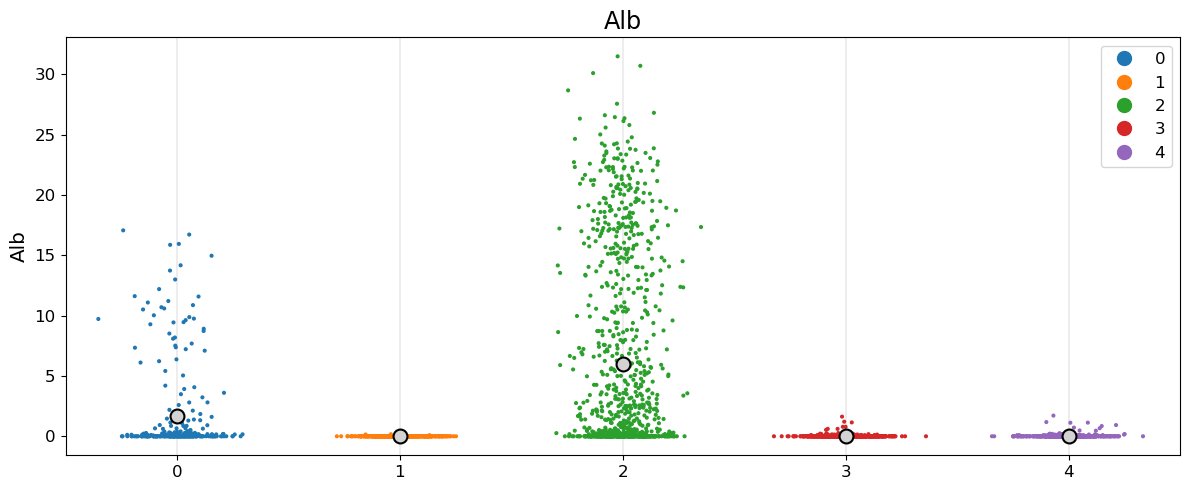

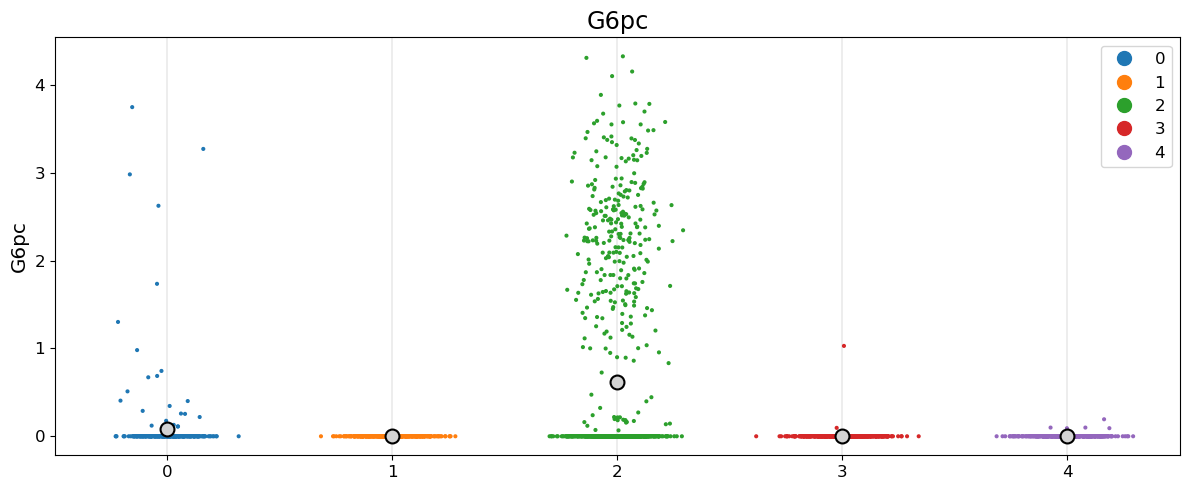

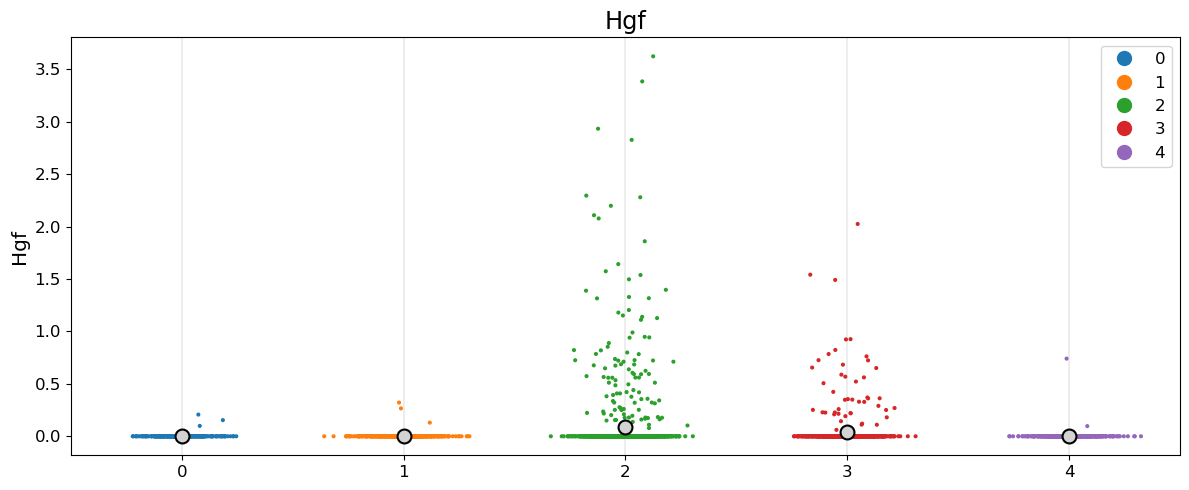

In [22]:
curr_gene = 'Akt1'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Hk2'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Gcg'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Ttr'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Ins1'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Pklr'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Alb'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'G6pc'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)

curr_gene = 'Hgf'
curr_expression = scprep.select.select_cols(data, exact_word=curr_gene)
scprep.plot.jitter(clusters, curr_expression, c=clusters, figsize=(12, 5),
                   legend_anchor=(1,1), title=curr_gene)
            

## <b> Differential Expression

'Akt1', 'Hk2', 'Gcg', 'Ttr', 'Ins1', 'Pklr', 'Alb', 'G6pc', 'Hgf'

In [23]:
data_sparse = scprep.utils.SparseDataFrame(data)

curr_cluster = 2
ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

top_genes = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]



<b> Most Diff Expressed Genes

In [27]:
top_genes.head(n=20)

B2m       54.226111
Apoe      49.181776
Pcsk2     46.985239
Scg3      46.396523
Cpe       46.383471
Scg5      45.633721
Chga      45.143890
Pcsk1n    44.139596
Scgn      43.886530
Ifitm3    43.807794
Ptprn2    43.308722
Ldha      43.245577
Ppia      43.144418
Syt13     42.639105
Pnmal2    42.381493
Scg2      42.094888
Resp18    41.590073
Aplp1     41.472968
Chgb      41.055806
Bex2      40.677402
Name: ttest, dtype: float64

In [28]:
data_sparse = scprep.utils.SparseDataFrame(data)

curr_cluster = 3
ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

top_genes = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

In [32]:
top_genes.head(n=20)

Resp18           73.073545
Scg5             71.992261
Pcsk2            69.791010
Gpx3             67.936308
Tmem27           64.430770
Cpe              62.905697
Aplp1            62.375253
Pcsk1n           62.137953
Gnas             60.401846
Cst3             59.207097
1700086L19Rik    56.063149
Scgn             54.922084
Etv1             52.873909
Spint2           49.338526
Pnmal2           47.001902
Pam              45.825613
Fam183b          45.513003
Mtap1b           44.908450
Scg3             44.683271
Ngfrap1          44.587091
Name: ttest, dtype: float64

In [33]:
data_sparse = scprep.utils.SparseDataFrame(data)

curr_cluster = 4
ttest_results = scprep.stats.differential_expression(data_sparse[clusters == curr_cluster],
                                                         data_sparse[clusters != curr_cluster],
                                                         measure='ttest')

top_genes = ttest_results['ttest'].abs().sort_values(ascending=False)[:50]

In [34]:
top_genes.head(n=20)

Ins2       115.810122
Iapp        93.002534
Scg2        70.969672
Ins1        69.056460
G6pc2       66.923324
Scg3        62.234098
Chga        59.744432
Ppp1r1a     58.959621
Ero1lb      54.966920
Slc30a8     53.568376
Hadh        52.524184
Syt13       50.555232
Prnp        48.217190
Bace2       47.970920
Prlr        47.339985
Ucn3        45.564784
Papss2      44.306657
Prss53      43.954392
Slc2a2      43.406139
Fam151a     43.323447
Name: ttest, dtype: float64